In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree # for decision tree
from sklearn.naive_bayes import GaussianNB # Naive Bayes Model
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron
from sklearn.neighbors import KNeighborsClassifier # kNN
import sklearn.svm as svm # SVM
import seaborn as sns

# Ensemble Models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

# Data
from sklearn.datasets import load_iris

# Training-testing set splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Confusion Matrix for Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# for saving/loading models
import pickle

import matplotlib.pyplot as plt # for plotting

#การนำข้อมูลเข้าและแปลงข้อมูลเป็นตัวเลขเพื่อทำการทดสอบ

เป็นการเชื่อม colab เข้ากับ drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/credit_card_approval.csv')

เราสนใจ Target จึงทำการดูว่า กลุ่มเป้าหมายมีกี่กลุ่ม

In [ ]:
df.TARGET.value_counts()

0    535705
1      1962
Name: TARGET, dtype: int64

ทำการดูว่าข้อมูลมีกี่ columns และ ข้อมูลเป็นชนิดอะไร

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

ทำการดูความสัมพันธ์ระหว่างตัวแปร

In [ ]:
df.corr()

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
ID,1.000000,-0.024915,0.029609,0.014325,NaN,0.098981,0.014584,-0.072886,0.004673,0.016717
AMT_INCOME_TOTAL,-0.024915,1.000000,-0.047838,-0.009500,NaN,-0.078836,0.007914,0.067699,-0.001829,0.002887
DAYS_BIRTH,0.029609,-0.047838,1.000000,0.324231,NaN,0.041483,-0.030423,0.055471,0.051247,-0.005401
DAYS_EMPLOYED,0.014325,-0.009500,0.324231,1.000000,NaN,0.003695,-0.026980,0.041690,0.044414,0.019230
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.098981,-0.078836,0.041483,0.003695,NaN,1.000000,0.372385,-0.069643,-0.002339,0.004353
FLAG_PHONE,0.014584,0.007914,-0.030423,-0.026980,NaN,0.372385,1.000000,0.014056,-0.007564,0.008663
FLAG_EMAIL,-0.072886,0.067699,0.055471,0.041690,NaN,-0.069643,0.014056,1.000000,0.005860,-0.001807
BEGIN_MONTHS,0.004673,-0.001829,0.051247,0.044414,NaN,-0.002339,-0.007564,0.005860,1.000000,-0.001646
TARGET,0.016717,0.002887,-0.005401,0.019230,NaN,0.004353,0.008663,-0.001807,-0.001646,1.000000


In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0
537663,5010773,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0
537664,5105601,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0
537665,5132833,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0


ทำการเปลี่ยนข้อมูลให้เป็นตัวเลข เพื่อใช่ในการเทรน เอไอ

In [ ]:
df['FLAG_OWN_CAR'] = df.FLAG_OWN_CAR.map({'Y': 1,'N': 0})

In [ ]:
df['FLAG_OWN_REALTY'] = df.FLAG_OWN_REALTY.map({'Y': 1,'N': 0})
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,1,0,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,0,0,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,1,1,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,1,1,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,1,1,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


value_counts() = ทำการดูว่าใน columns ว่ามี labels อะไรบ้างอยู่ใน columns

In [ ]:
df.CNT_CHILDREN.value_counts()

No children    343151
1 children     127695
2+ children     66821
Name: CNT_CHILDREN, dtype: int64

เปลี่ยนดาต้าประเภท string ให้เป็น 0, 1

In [ ]:
df['CNT_CHILDREN'] = df.CNT_CHILDREN.map({'No children': 0,'1 children': 1,'2+ children': 2})
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,1,0,2,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,0,0,0,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,1,1,0,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,1,1,1,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,1,1,2,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 384003
Single / not married     65944
Civil marriage           44083
Separated                31394
Widow                    12243
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
df['NAME_FAMILY_STATUS'] = df.NAME_FAMILY_STATUS.map({'Single / not married': 1,'Widow': 1,'Separated': 1,'Civil marriage': 0,'Married': 0})
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,1,0,2,270000.0,Secondary / secondary special,0,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,0,0,0,81000.0,Secondary / secondary special,1,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,1,1,0,270000.0,Higher education,0,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,1,1,1,112500.0,Secondary / secondary special,0,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,1,1,2,139500.0,Secondary / secondary special,0,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
df.STATUS.value_counts()

C    226185
0    200930
X    102167
1      6423
5      1087
2       542
3       181
4       152
Name: STATUS, dtype: int64

In [ ]:
df['STATUS'] =  df['STATUS'].map({'0':0,'1':0,'2':0,'3':1,'4':2,'5':3,'X':0,'C':0})
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,1,0,2,270000.0,Secondary / secondary special,0,With parents,-13258,-2300,1,0,0,0,Managers,-6,0,0
1,5142753,F,0,0,0,81000.0,Secondary / secondary special,1,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,1,1,0,270000.0,Higher education,0,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,0,0
3,5010310,F,1,1,1,112500.0,Secondary / secondary special,0,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,1,1,2,139500.0,Secondary / secondary special,0,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


y_c ตัวสำหรับเป็นผลเฉลย
x_c ตัวที่ใช้เพื่อทำนายผลเฉลย

In [ ]:
y_c = df["TARGET"]
x_c = df[["FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","STATUS"]] # Type will need to be transformed

เป็นการแยกข้อมูลเพื่อนำมาทดสอบ 30 เปอร์เซ็นต์ และ สอน 70 เปอร์เซ็นต์

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_c, y_c, test_size=0.3)


In [ ]:
x_name = ["FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","STATUS"]

#DecisionTree

entropy คือ วิธีการแบ่งข้อมูล ซึ่งมีวิธีการคำนวณแตกต่างกันไปในแต่ละวิธีการแบ่ง
hyper parameter เช่น criterion ประกอบด้วย gini entropy log_loss

In [ ]:
x_name = ["FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","STATUS"]

In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a classifier
decTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

scores = cross_val_score(decTree, X_train, y_train, cv=5)

print(scores)

[0.99892393 0.9990302  0.99896377 0.9989372  0.99907005]


นำข้อมูลมาหาความสัมพันธ์ x_train กับ y_train แล้วนำ model มาใส่ใน decTree



In [ ]:
decTree = decTree.fit(X_train, y_train)

เป็นการบอกความแม่นยำของ model

In [ ]:
decTree.score(X_test, y_test)


0.9990080656660529

In [ ]:
# Print tree
from sklearn.tree import export_text

r = export_text(decTree, feature_names=x_name)
print(r)

|--- STATUS <= 0.50
|   |--- AMT_INCOME_TOTAL <= 110250.00
|   |   |--- AMT_INCOME_TOTAL <= 106875.00
|   |   |   |--- class: 0
|   |   |--- AMT_INCOME_TOTAL >  106875.00
|   |   |   |--- class: 0
|   |--- AMT_INCOME_TOTAL >  110250.00
|   |   |--- AMT_INCOME_TOTAL <= 255600.00
|   |   |   |--- class: 0
|   |   |--- AMT_INCOME_TOTAL >  255600.00
|   |   |   |--- class: 0
|--- STATUS >  0.50
|   |--- class: 1



นำ x_test มาทดสอบกับโมเดลว่ามีความแม่นยำไหม

In [ ]:
y_pred = decTree.predict(X_test)

cm เป็นเครื่องมือที่ใช้ในการประเมินประสิทธิภาพของ ai จะเปรียบเทียบตัวที่ทำนายกับตัวเฉลย

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ตารางที่แสดงข้อมูล ว่าโมเดลมีการทำนายข้อมูลว่าออกมาว่าทำนายผิดกี่ตัวถูกกี่ตัว

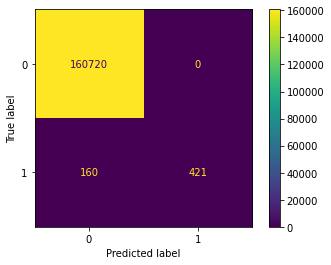

In [ ]:
y_names =["0","1"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)

disp.plot()

plt.show()

เป็นการรายงานผลว่าข้อมูลที่ทำนายถูกกี่ เปอร์เซ็นต์

In [ ]:
print(classification_report(y_test, y_pred, target_names=y_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160720
           1       1.00      0.72      0.84       581

    accuracy                           1.00    161301
   macro avg       1.00      0.86      0.92    161301
weighted avg       1.00      1.00      1.00    161301



#Naive Bayes Model

เป็นโมเดลการเรียนรู้

In [ ]:
gnb = GaussianNB()

ทำการนำค่า X_train ไปเทียบ y_train โดยใช้ โมเดล Naive Bayes เพื่อให้ได้ model
ที่สอดคล้องกับข้อมูล



In [ ]:
gnb = gnb.fit(X_train, y_train)

ดูค่าความแม่นของโมเดลที่ทำการสอนโดยดูจาก X_test, y_test

In [ ]:
gnb.score(X_test, y_test)

0.9955796926243483

ดูแถวที่ 0-5 ของ X_test โดยโอกาส 0.997 จะเป็นลูกค้าที่ดี และ โอกาส 0.003 จะเป็นลูกค้าที่แย่

In [ ]:
gnb.predict_proba(X_test[0:5])

array([[0.99714317, 0.00285683],
       [0.99735217, 0.00264783],
       [0.99713997, 0.00286003],
       [0.99712594, 0.00287406],
       [0.99726533, 0.00273467]])

ตารางที่แสดงข้อมูล ว่าโมเดลมีการทำนายข้อมูลว่าออกมาว่าทำนายผิดกี่ตัวถูกกี่ตัว จะมี false negative 582 , false positive 98 และ true negative 0  

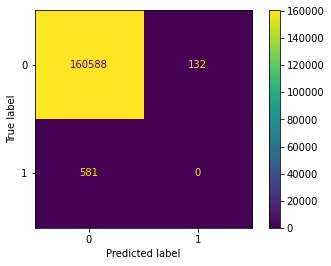

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160720
           1       0.00      0.00      0.00       581

    accuracy                           1.00    161301
   macro avg       0.50      0.50      0.50    161301
weighted avg       0.99      1.00      0.99    161301



In [ ]:
y_pred_gnb = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gnb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)

disp.plot()

plt.show()

print(classification_report(y_test, y_pred_gnb, target_names=y_names))

#K-Nearest Neighbors

เป็นโมเดลการเรียนรู้ ที่ใช้สำหรับการจำแนกคลาส (Classification) หรือการทำนายค่า (Prediction) โดย n_neighbors = 5 จะเลือกตัวใกล้ๆกับตัวนั้นมา 5 ตัว


In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5)

ทำการนำค่า X_train ไปเทียบ y_train โดยใช้ โมเดล KNN เพื่อให้ได้ model ที่สอดคล้องกับข้อมูล

In [ ]:
kNN = kNN.fit(X_train, y_train)

นำโมเดลที่ทำ เปรียบเทียบกับ X_test y_test

In [ ]:
kNN.score(X_test, y_test)

0.9986856870075201

ตารางที่แสดงข้อมูล ว่าโมเดลมีการทำนายข้อมูลว่าออกมาว่าทำนายผิดกี่ตัวถูกกี่ตัว

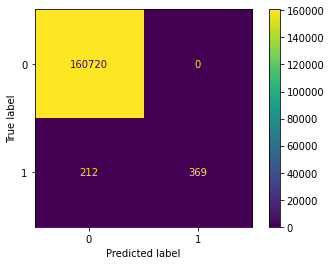

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160720
           1       1.00      0.64      0.78       581

    accuracy                           1.00    161301
   macro avg       1.00      0.82      0.89    161301
weighted avg       1.00      1.00      1.00    161301



In [ ]:
y_pred_knn = kNN.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)

disp.plot()

plt.show()

print(classification_report(y_test, y_pred_knn, target_names=y_names))

#artificial neural network

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create and Train ANN Model
จะต้องกำหนดโครงสร้าง ANN

โดย Input Layer มีจำนวน Node เท่ากับจำนวนคอลัมน์ Attribute
ส่วน Output Layer มีจำนวน Node เท่ากับจำนวนค่า Class (Node ไหนให้ค่ามากที่สุด ก็จะเป็น Class นั้น)
สิ่งที่ต้องกำหนดเพิ่ม คือ Hidden Layer เช่น (8, 2) คือ มี Hidden Layer 2 ชั้น มี Node อยู่ 8 และ 2 Node ตามลำดับ

In [ ]:
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2))

In [ ]:
ann = ann.fit(X_train_scaled, y_train)

In [ ]:
ann.score(X_test_scaled, y_test)

0.9990080656660529

ann.coefs_ จะเก็บค่า Weight ไว้

In [ ]:
ann.coefs_[0]

array([[-0.64188094, -1.04153187,  0.48973321,  1.1611563 , -0.39362558,
        -0.93769699, -0.81622771,  1.06247416],
       [ 0.3305821 ,  0.50655013,  0.08024656, -0.61085855, -0.01327991,
         0.46138621, -0.64724513,  0.82665317],
       [ 0.4173155 , -0.24470455,  0.01807008, -0.12371512,  0.12720171,
         0.40284237, -0.10565061, -0.02698642],
       [-0.16845937,  0.05958397,  0.11356199, -0.12143903,  0.06409551,
        -0.10079019, -0.03930954,  0.22559752],
       [-0.74177598, -0.17495773,  2.30462869, -1.46040033, -0.29686864,
        -0.23062425,  0.30280223,  0.19040588],
       [ 0.97187435,  0.06745733,  0.42392647,  0.08348269,  0.42067953,
        -1.38664115, -0.10647852, -0.42847485],
       [ 0.9125546 , -0.4413126 ,  0.61916288, -0.70662446, -0.0722433 ,
         0.65473115,  0.00580807, -0.37690628],
       [-0.7211246 , -0.31221831, -1.01177996, -0.67300157, -0.1535062 ,
        -0.60825401, -0.30417904, -0.49826122]])

ส่วน intercepts_ จะเป็น Bias ของ Hidden Layer และ Output Layer ไว้

In [ ]:
ann.intercepts_[1]

array([-1.15996333,  0.00226916])

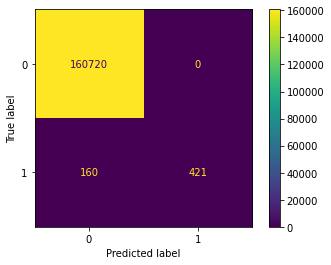

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160720
           1       1.00      0.72      0.84       581

    accuracy                           1.00    161301
   macro avg       1.00      0.86      0.92    161301
weighted avg       1.00      1.00      1.00    161301



In [ ]:
y_pred_ann = ann.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_ann)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)

disp.plot()

plt.show()
print(classification_report(y_test, y_pred_ann, target_names=y_names))